# Building our Neural Network

### Introduction

In the last lesson, we saw how to work with and format our image data using Pytorch.  In this lesson, we'll work with our dataset of handwritten digits again, but this time feeding it into a neural network, and then using the neural network to identify some images. 

### Getting our Data

Once again, we'll need to download our data, which we can do so with the following line of code:

> Note: If trying to install keras on your laptop, run the following from the terminal:  `sudo pip3 install --upgrade --ignore-installed tensorflow`

In [2]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

And then let's make sure we still have our digits.

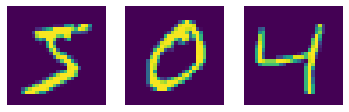

In [3]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image)

And we can also make sure we have our corresponding labels.

In [4]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

Now as we know, we'll have to convert this data into tensors and make sure the data is of type float, so let's take care of that now.

In [69]:
import torch

X_train_tensor = torch.tensor(X_train).float()

y_train_tensor = torch.tensor(y_train).long()

### Reshaping our Data

Now, as you may remember from the previous lesson, the next step will be to reshape our `X_tensor` data.  Let's better understand why we need to do that.  

If we think about how we built a neural network in the past, our neural network consisted of a linear layer followed by an activation function, which we represented mathematically as the following:

$z(x) = w_1x_1 + w_2x_2 ... w_nx_n + b = w \cdot x + b$

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

And focusing on that linear layer, remember that we have a separate weight for each feature in an observation.  So when working with image data, our feature are really the pixel values in of our 28x28 elements.

In [70]:
X_tensor.shape

torch.Size([60000, 28, 28])

So this is why we need to turn this 28x28 grid into one long list -- so that we can pass it as a vector to our linear function $z(x)$.  Ok, so let's reshape our our `X_train` tensor to be 60000 vectors.

In [71]:
X_reshaped = X_tensor.view(60000, -1)

X_reshaped.shape

torch.Size([60000, 784])

### Building our Neural Network

Now previously, we built a relatively simple neural network, that consisted of one a linear layer, and an activation layer, and a single neuron.  We implemented it with the following.

In [72]:
import torch.nn as nn

net = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

Remember that, in the linear layer, the first number -- above 2 -- specified the number of input features per observation, and that the second argument -- above 1 -- specified the number of neurons.  

> If we look at our linear layer, we'll see that this translates into a single vector of length 2, along with our bias term.

In [73]:
net[0]._parameters

OrderedDict([('weight',
              Parameter containing:
              tensor([[0.4340, 0.6051]], requires_grad=True)),
             ('bias',
              Parameter containing:
              tensor([-0.5125], requires_grad=True))])

Now for our image data, we'll essentially need more of everything.  First, remember that each pixel in the image is treated as a separate feature.  So this means that our weight vectors should be of length $28x28 = 784$.  Also, instead of one neuron, we'll have 64 neurons.  And we'll also add additional layers of our neural network.

> We'll see how these additional neurons, and layers can help us in the lessons that follow. 

In [74]:
import torch.nn as nn

net = nn.Sequential(
    nn.Linear(28*28, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10)
)

net

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

> Add in about layers and neurons here...

### Making a Prediction

Ok, so we just created a neural network that will take in our tensors representing images.  Now before we train this neural network, let's make sure we undertand how it will predict what each image is.  We can see this by selecting our first image and passing it into our neural network.

In [75]:
first_img = X_reshaped[0]

> Remember that this is just one long tensor.

In [76]:
first_img[:150]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])

And when we pass it into our neural network, we get the following list:

In [77]:
pred = net(first_img)

pred

tensor([-0.2774,  0.1835, -0.8635, -0.5925,  0.0163, -0.3360,  0.4016, -0.4791,
         0.3488,  0.0700], grad_fn=<AddBackward0>)

Ok, so what is that?  Well, notice that our neural network returns a list of ten digits for a single picture.  This is because, it's predicting the likelihood that the photo matches any particular label.  We can see this even easier by passing our data through to Pytorch's softmax function:

In [78]:
import torch.nn.functional as F

F.softmax(pred, dim = 0)

tensor([0.0818, 0.1296, 0.0455, 0.0597, 0.1097, 0.0771, 0.1612, 0.0668, 0.1529,
        0.1157], grad_fn=<SoftmaxBackward>)

Ok, so now perhaps this can make more sense.  Each number in the list above represents the *likelihood* of the image being any particular digit.  So looking at the first two numbers above, our neural network predicted an $8.5%$ likelihood of the picture representing the digit $0$, and an $8.1$ percent of representing the digit $1$.  The index with the largest number is the predicted digit. 

> Here, the argmax function tells us that's 4.

In [79]:
torch.argmax(pred)

tensor(6)

So we can see that our neural network predicts that the first image is a 4.  In future lessons, we'll better understand this prediction function.  For now, let's move onto training the neural network.

### Training a Neural Network

So we just used our neural network to make a prediction.  But we have not yet trained our neural network -- that is, we haven't yet taught our neural network how to recognize digits.  Let's do that now.  Remember that our procedure for training is the following:

```python
y_hat = net(X_tensor)             # 1. start with random weights and make the prediction
loss = criterion(y_hat, y_tensor) # 2. See how off the prediction is according to the cost function
loss.backward()                   # 3a. Calculate the slope of the cost curve at that weight
opt.step()                        # 4. Update the parameters based on the learning rate and the calculated slope 
```

So once again, we are repeatedly updating our weights to descend along our cost curve, to find the ideal weights for our neuron.

So let's start.  As we know, we'll need our *loss function*, which will evaluate how far off each prediction is.  And we'll need our optimizer, which is where we'll specify our learning rate.

In [80]:
import torch.optim as optim

x_loss = nn.CrossEntropyLoss()

adam = optim.Adam(net.parameters(), lr=0.0005)

And now it's time to go through our three steps for training the neural network.

##### 1. Predict the output

In [81]:
pred = net(X_reshaped[:1])
pred

tensor([[-0.2774,  0.1835, -0.8635, -0.5925,  0.0163, -0.3360,  0.4016, -0.4791,
          0.3488,  0.0700]], grad_fn=<AddmmBackward>)

##### 2. Calculate the loss (by comparing the prediction with the label)

In [82]:
first_label = y_train_tensor[:1]
first_label

tensor([5])

In [83]:
loss = x_loss(pred, first_label)
loss

tensor(2.5626, grad_fn=<NllLossBackward>)

##### 3. Update the neural network

To update the neural network, we call two functions.  The backward function calculates *how* to update the neural network, and the step function actually makes the updates.

In [84]:
loss.backward()
adam.step()

Ok, so that's how we train our neural network on a single image.  Now we just need to loop through each of our images following the training steps that we just saw: 

1. Have our neural network make a prediction, 
2. Calculate how far off the prediction is
3. Determine how to update the neural network and 
4. Make the update

### Putting it all together

Ok, so it's time to train on all of our images.  

Doing this will take some time (about 10 minutes) -- but it will take a lot longer, if we do not first switch to having colab use the GPU (which is faster than the CPU it's currently using).  To make the switch, you'll first need to go to the menu bar and click on `runtime` and then click on `change runtime type`.

> <img src="./change_runtime_type.png" width="30%">

From there, change the runtime type to GPU.

> <img src="./to_gpu.png" width="40%">

Ok, now let's go through the steps of creating a neural network, and then training it.  We create our neural network with the following:

In [38]:
net = Net()

And then call the `cuda` function so that this runs on the GPU.

In [ ]:
net.cuda()

Then we also need the training data and labels to run on the GPU, so we call cuda on them as well.

In [40]:
X_train_tensor_gpu = X_train_tensor.cuda()

y_train_tensor_gpu = y_train_tensor.cuda()

Then let's reinitializer our loss function, and the optimizer.

In [41]:
import torch.optim as optim

x_loss = nn.CrossEntropyLoss()
adam = optim.Adam(net.parameters(), lr=0.0005)

And finally, let's loop through the data.

In [106]:
for epoch in range(3):
    for (x, y) in zip(x_train_tensor_gpu, y_train_tensor_gpu):
        net.zero_grad()  
        X_reshaped = x.view(-1,28*28) # change image from grid to a list
        prediction = net(X_reshaped) # make prediction
        loss = x_loss(prediction, y) # calculate loss
        loss.backward() # determine how to update the neural network
        adam.step() # make the update
    print(loss)

tensor(1.0554, grad_fn=<NllLossBackward>)
tensor(0.1444, grad_fn=<NllLossBackward>)
tensor(0.7173, grad_fn=<NllLossBackward>)
tensor(0.1364, grad_fn=<NllLossBackward>)
tensor(0.0828, grad_fn=<NllLossBackward>)
tensor(2.5173, grad_fn=<NllLossBackward>)
tensor(0.1435, grad_fn=<NllLossBackward>)
tensor(0.1413, grad_fn=<NllLossBackward>)


### Evaluating our Neural Network

Ok, so to see how good of a job our neural network does at evaluating images, we don't want to use the same images we used to train our neural network -- our neural network has already seen these, as well as the answers.  Instead, we want to see how well our neural network performs on some images that it hasn't yet seen.  
These are the images in our test set, which we downloaded when we downloaded our dataset.  To use the data in our test set, we first need to convert `X_test` into a tensor. 

In [64]:
X_test_gpu = torch.tensor(X_test).view(-1, 28*28).float().cuda()

And then we can see how well it performed with the first image.

In [126]:
predictions_test = net(X_test_gpu)

In [127]:
torch.argmax(predictions_test[:1], dim = 1)

# 7

tensor([[1.8848e-12, 2.2202e-16, 4.5645e-16, 1.6148e-15, 1.4248e-14, 4.9672e-02,
         3.9909e-13, 7.0305e-01, 8.7145e-04, 2.4641e-01]],
       grad_fn=<ExpBackward>)

Which looks like a good prediction.

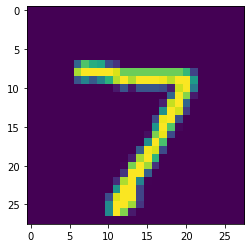

In [65]:
plt.imshow(X_test[0])

And then we can get the predictions for the entire test set by passing the predictions into the `argmax` function.

In [128]:
hard_predictions = torch.argmax(predictions_test, axis = 1)

And we can eyeball how well our first predictions match up with the labels. 

In [129]:
hard_predictions[:10]

tensor([7, 2, 1, 1, 2, 1, 2, 2, 8, 7])

In [130]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

Looking good so far.  Next, let's check the accuracy of our neural network on our testset.

In [1]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, hard_predictions.cpu())

# 0.8881

So we can see that our neural network identifies $.89$ of the data correctly.  Not too bad for our first neural network.

### Summary

In this lesson, we trained a neural network in Pytorch.  Nice work!!

### Resources

[Colab Deeep Learning](https://colab.research.google.com/github/margaretmz/deep-learning/blob/master/fashion_mnist_keras.ipynb#scrollTo=d44TznbgZZgm)

[Log Softmax](https://stats.stackexchange.com/questions/436766/cross-entropy-with-log-softmax-activation)